# Project 1
----

### Analysis

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from pprint import pprint

# Import API key
#from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (PNG)
output_us_suicide_vs_age = "../Images/us_suicide_vs_age_line.png"
output_facilities_vs_pop = "../Images/mh_facilities_vs_population.png"
output_us_avg_suicide_rts_error_bar = "../Images/us_avg_suicide_rts_error_bar.png"
output_facilities_google_map = "../Images/us_mh_facilities.png"
output_us_avg_vs_world_avg = "../Images/us_vs_world_line.png"

# Output File (CSV)
output_facility_data_file = "../data/cleandata/facilities.csv"
output_population_data_file = "../data/cleandata/population.csv"

## Data Gathering


In [2]:
#Mental Health Facilities in the US
#facilities_file = "../data/rawdata/Behavioral_Health_Treatment_Facility_listing_2019_03_22_215606.csv"
facilities_file = "../data/rawdata/Behavioral_Health_Treament_Facility_listing_2019_03_22_215606.csv"
facilities_df = pd.read_csv(facilities_file)

#Keep only necessary columns
facilities_df_sub = facilities_df[['    name1', 'name2', 'city', 'state', 'zip', 'latitude', 'longitude']]

#Suppress leading spaces on column header for name1
facilities_df_final = facilities_df_sub.rename(columns={"    name1":"name1"})

#Look at data for consistency
facilities_df_final.count()

name1        9686
name2        5430
city         9686
state        9686
zip          9686
latitude     9685
longitude    9685
dtype: int64

In [3]:
#drop one row with no latitude and longitude data
facilities_df_final.dropna(subset=['latitude', 'longitude'], inplace=True)
facilities_df_final.count()

name1        9685
name2        5429
city         9685
state        9685
zip          9685
latitude     9685
longitude    9685
dtype: int64

In [4]:
#remove us territories:  GU (Guam), AS (), PR (Puerto Rico), VI (Virgin Islands) 
#Note: keeping Washington DC in data, so total group of states will be 51
us_facilities_df = facilities_df_final[(facilities_df_final.state != 'GU') & (facilities_df_final.state != 'AS') & (facilities_df_final.state != 'PR') & (facilities_df_final.state != 'VI')]
print(us_facilities_df.count())
print(us_facilities_df.state.unique())

name1        9614
name2        5379
city         9614
state        9614
zip          9614
latitude     9614
longitude    9614
dtype: int64
['TX' 'LA' 'AR' 'MS' 'OK' 'AL' 'MO' 'TN' 'KS' 'NM' 'FL' 'IL' 'KY' 'GA'
 'CO' 'NE' 'IN' 'IA' 'NC' 'SC' 'AZ' 'VA' 'OH' 'SD' 'WI' 'WY' 'WV' 'MN'
 'UT' 'MI' 'PA' 'CA' 'MD' 'ND' 'NV' 'MT' 'DC' 'ID' 'NY' 'DE' 'NJ' 'CT'
 'MA' 'VT' 'OR' 'RI' 'NH' 'WA' 'ME' 'AK' 'HI']


In [5]:
# Export file as a CSV, without the Pandas index, but with the header
us_facilities_df.to_csv(output_facility_data_file, index=False, header=True)


In [6]:
#US Census Bureau population in 50 US States
us_population_file = "../data/rawdata/PopulationEstimatesByState.csv"
pop_df = pd.read_csv(us_population_file)

#rename abbreviation column to state so as to be able to merge data with other files
pop_df = pop_df.rename(columns={"Abbv":"state",
                                "States":"State Name"})

#remove commans in population counts and make it a numeric field
pop_df['Population'] = pop_df['Population'].str.replace(',', '')
pop_df["Population"] = pd.to_numeric(pop_df["Population"])
print(pop_df.head())

## Export file as a CSV, without the Pandas index, but with the header
pop_df.to_csv(output_population_data_file, index=False, header=True)

  state  State Name  Population
0    AL     Alabama     4887871
1    AK      Alaska      737438
2    AZ     Arizona     7171646
3    AR    Arkansas     3013825
4    CA  California    39557045


In [7]:
# Merge two dataframes using an inner join
merge_table = pd.merge(facilities_df_final, pop_df, on="state", how='inner')
merge_table.head()


,name1,name2,city,state,zip,latitude,longitude,State Name,Population
0,Sheltering Harbour,NaN,Spring,TX,77379,30.031183,-95.489886,Texas,28701845
1,Cypress Creek Hospital,NaN,Houston,TX,77090,30.024661,-95.444850,Texas,28701845
2,Intracare North Hospital,NaN,Houston,TX,77090,30.023827,-95.440085,Texas,28701845
3,Tomball Regional Medical Center,Senior Care Behavioral Health,Tomball,TX,77375,30.087405,-95.623617,Texas,28701845
4,Unity Childrens Home,Trickey Road Location,Houston,TX,77067,29.956039,-95.445391,Texas,28701845


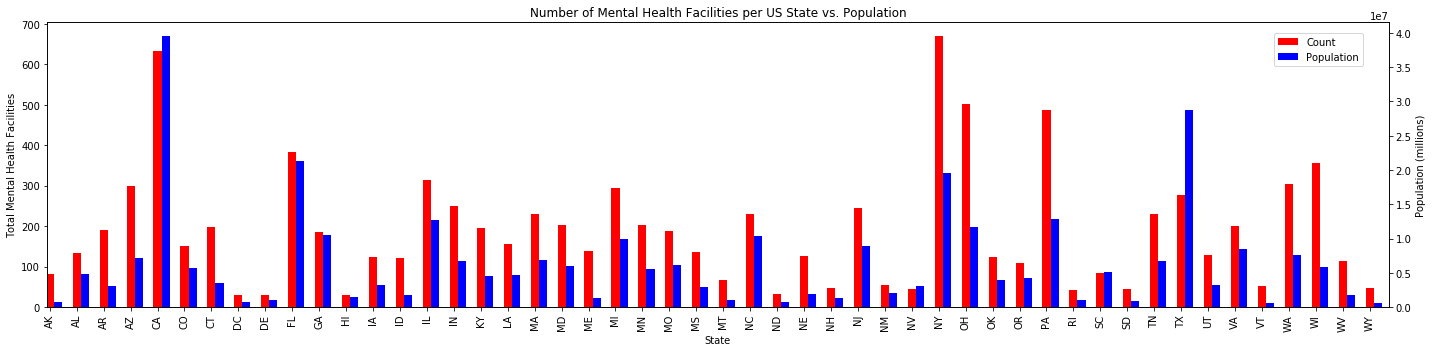

In [8]:
facilities_count_by_state = merge_table.groupby('state').agg({'name1':'count','Population':'mean'})
#facilities_count_by_state['Population'] = facilities_count_by_state['Population']/facilities_count_by_state['name1']
facilities_count_by_state.rename(columns={"name1":"Count"}, inplace=True)
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

facilities_count_by_state.Count.plot(kind='bar', color='red', ax=ax, figsize=(20,5), position=1, align='edge', width=0.3)
facilities_count_by_state.Population.plot(kind='bar', color='blue', ax=ax2, figsize=(20,5), position=0, align='edge', width=0.3)

ax.set_title("Number of Mental Health Facilities per US State vs. Population")
ax.set_xlabel("State")
ax.set_ylabel('Total Mental Health Facilities')
ax2.set_ylabel('Population (millions)')

fig.legend(loc='upper right', bbox_to_anchor=(0.95, 0.90))

# Save our graph and show the graph
plt.tight_layout()
plt.savefig(output_facilities_vs_pop)
plt.show()


In [39]:
facilities_count_by_state.rename(columns={"name1":"Facility Count"}, inplace=True)
facilities_count_by_state.head()

,Count,Facility/Population
state,,
AK,82,8993.146341
AL,133,36750.909774
AR,190,15862.236842
AZ,299,23985.438127
CA,634,62392.815457


Text(0, 0.5, 'State Population in Millions')

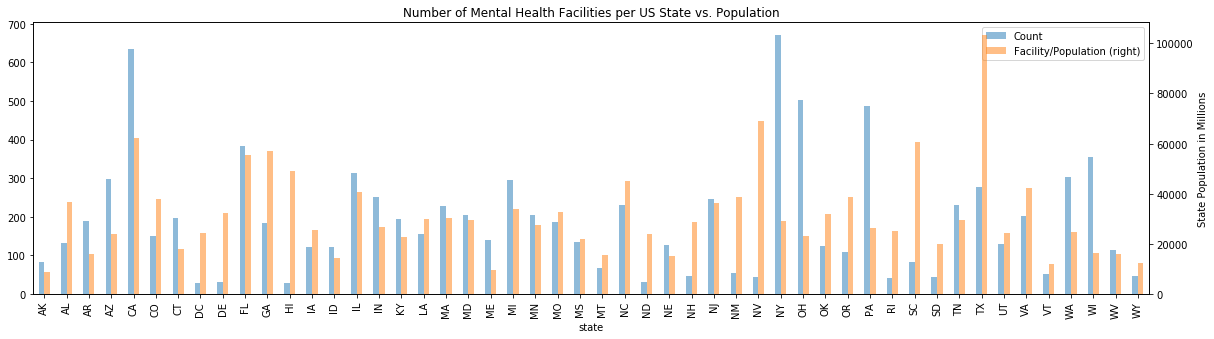

In [41]:
#plot how many mental health facilities found in each state
#facilities_count_by_state = us_facilities_df.groupby('state').name1.count()
facilities_count_by_state.plot.bar(secondary_y= 'Facility/Population', figsize=(20,5), alpha=0.5)


plt.title("Number of Mental Health Facilities per US State vs. Population")
plt.xlabel("State")
plt.ylabel("State Population in Millions")

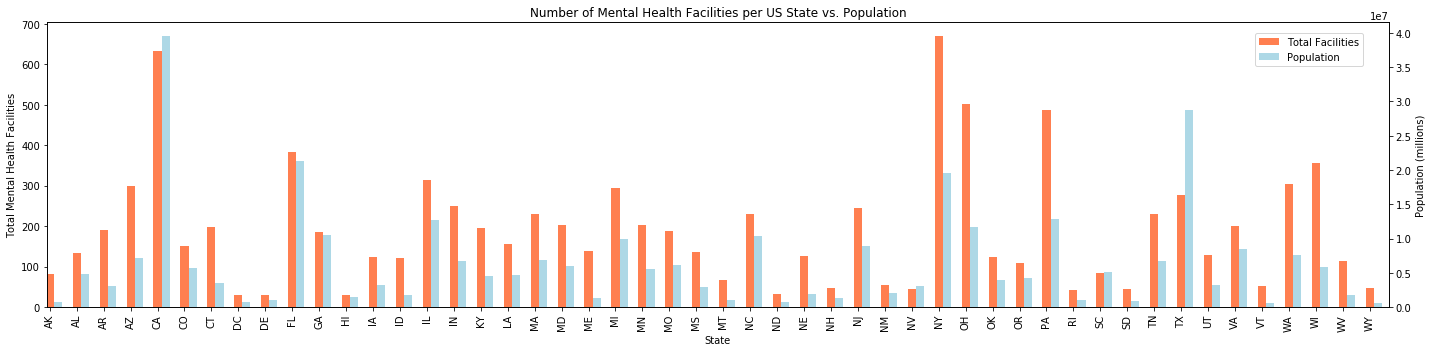

In [9]:
#Group merged dt by state so as to plot the bar chart by state
facilities_count_by_state = merge_table.groupby('state').agg({'name1':'count','Population':'mean'})
facilities_count_by_state.rename(columns={"name1":"Total Facilities"}, inplace=True)
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

facilities_count_by_state['Total Facilities'].plot(kind='bar', color='coral', ax=ax, figsize=(20,5), position=1, align='edge', width=0.3)
facilities_count_by_state.Population.plot(kind='bar', color='lightblue', ax=ax2, figsize=(20,5), position=0, align='edge', width=0.3)

ax.set_title("Number of Mental Health Facilities per US State vs. Population")
ax.set_xlabel("State")
ax.set_ylabel('Total Mental Health Facilities')
ax2.set_ylabel('Population (millions)')

fig.legend(loc='upper right', bbox_to_anchor=(0.95, 0.90))

# Save our graph and show the graph
plt.tight_layout()
plt.savefig(output_facilities_vs_pop)
plt.show()


## Use master.csv to create a line plot of suicide totals over time sorted by age group

In [8]:
suicide_us = "../data/cleandata/master.csv"
suicide_df = pd.read_csv(suicide_us)
len(suicide_df.country.unique())
#US_data = suicide_df [suicide_df['country'] == 'United States']
#US_data.head()


101

In [11]:
US_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 26848 to 27219
Data columns (total 12 columns):
country               372 non-null object
year                  372 non-null int64
sex                   372 non-null object
age                   372 non-null object
suicides_no           372 non-null int64
population            372 non-null int64
suicides/100k pop     372 non-null float64
country-year          372 non-null object
HDI for year          120 non-null float64
 gdp_for_year ($)     372 non-null object
gdp_per_capita ($)    372 non-null int64
generation            372 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 37.8+ KB


In [19]:
#create a dt with only necessary columnns
US_data_sub=US_data[['year', 'age', 'suicides_no', 'population', 'suicides/100k pop']]
#gather data in groups by year and age range to plot trends
df_age_grp_by_yr=US_data_sub.groupby(['year','age'], as_index=False)
df_tot_by_yr=df_age_grp_by_yr['suicides_no'].sum()
df_tot_by_yr.head()

,year,age,suicides_no
0,1985,15-24 years,5121
1,1985,25-34 years,6376
2,1985,35-54 years,8158
3,1985,5-14 years,278
4,1985,55-74 years,6870


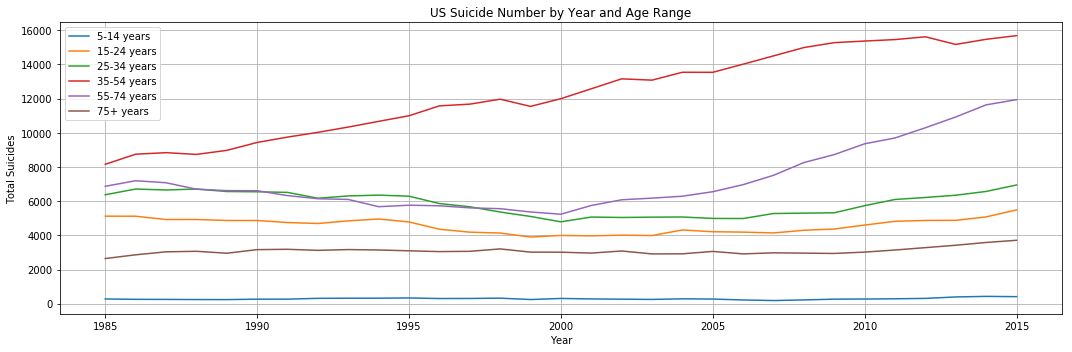

In [27]:
#Line graph age range vs. suicide rate in US
age_grp_1 = df_tot_by_yr.loc[df_tot_by_yr['age']=="5-14 years", 'suicides_no']
age_grp_2 = df_tot_by_yr.loc[df_tot_by_yr['age']=="15-24 years", 'suicides_no']
age_grp_3 = df_tot_by_yr.loc[df_tot_by_yr['age']=="25-34 years", 'suicides_no']
age_grp_4 = df_tot_by_yr.loc[df_tot_by_yr['age']=="35-54 years", 'suicides_no']
age_grp_5 = df_tot_by_yr.loc[df_tot_by_yr['age']=="55-74 years", 'suicides_no']
age_grp_6 = df_tot_by_yr.loc[df_tot_by_yr['age']=="75+ years", 'suicides_no']
time_line = df_tot_by_yr['year'].unique()

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(time_line, age_grp_1, label="5-14 years")
ax.plot(time_line, age_grp_2, label="15-24 years")
ax.plot(time_line, age_grp_3, label="25-34 years")
ax.plot(time_line, age_grp_4, label="35-54 years")
ax.plot(time_line, age_grp_5, label="55-74 years")
ax.plot(time_line, age_grp_6, label="75+ years")
ax.legend()

# Incorporate the other graph properties
plt.title(f"US Suicide Number by Year and Age Range" )
plt.ylabel("Total Suicides")
plt.xlabel("Year")
plt.grid(True)


fig.tight_layout()
fig.savefig(output_us_suicide_vs_age)

plt.show()

## Suicide rates us vs world
        

In [26]:
summary_df['suicides/100k pop'].mean()

153.7511670281994

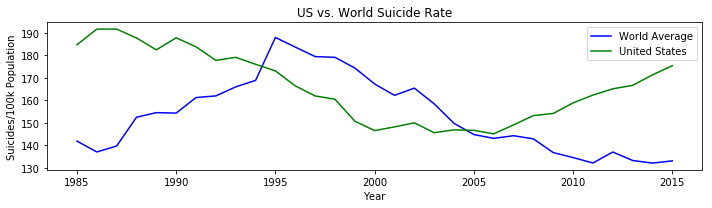

In [24]:
suicide_df = pd.read_csv(suicide_us)
#remove 2016 data b/c only there for some countries
suicide_new_df = suicide_df[suicide_df['year']!=2016]

summary_df = suicide_new_df.groupby(['country', 'year'], as_index=False).agg({'suicides/100k pop':'sum'})
#summary_df = suicide_df.groupby(['country', 'year'],as_index=False).agg({'suicides_no':'sum',
#                                                                         'population':'sum',
#                                                                         'suicides/100k pop':'sum'})


summary_df.pivot(index='country', columns='year', values='suicides/100k pop')
# Set the 'Country Code' to be our index for easy referencing of rows
summary_df = summary_df.set_index("country")
# Collect the mean suicide rates for the world
average_suicide = summary_df.groupby('year').mean()
# Collect the years where data was collected
years = summary_df.year.unique()

#i have no idea why I can't get series returned just using the .loc; this is a workaround
x=summary_df.loc[['United States'], ["year", "suicides/100k pop"]].groupby('year')
us_average = x.mean()

fig = plt.figure(figsize=(10,3))

# Plot the world average as a line chart
world_avg, = plt.plot(sorted(years), average_suicide, color="blue", label="World Average" )

# Plot the unemployment values for a single country
country_one, = plt.plot(sorted(years), us_average, color="green",label='United States')

# Create a legend for our chart
plt.legend(handles=[world_avg, country_one], loc="best")
plt.title(f"US vs. World Suicide Rate" )
plt.ylabel("Suicides/100k Population")
plt.xlabel("Year")

# Show the chart
fig.tight_layout()
fig.savefig(output_us_avg_vs_world_avg)

plt.show()

In [53]:
us_average

,suicides/100k pop
year,
1985,184.72
1986,191.65
1987,191.66
1988,187.71
1989,182.44
1990,187.80
1991,183.77
1992,177.77
1993,179.12


In [14]:
average_suicide

,suicides/100k pop
year,
1985,141.914375
1986,137.080000
1987,139.730556
1988,152.512857
1989,154.548846
1990,154.355469
1991,161.266562
1992,161.982769
1993,166.004462


In [51]:
summary_df.groupby('country').head()

,year,suicides/100k pop
country,,
Albania,1987,31.85
Albania,1988,32.46
Albania,1989,33.40
Albania,1992,18.00
Albania,1993,32.56
Antigua and Barbuda,1985,0.00
Antigua and Barbuda,1986,0.00
Antigua and Barbuda,1987,0.00
Antigua and Barbuda,1988,0.00


## work area

In [150]:
suicide_us = "../data/cleandata/SuicByState10yr.csv"
suicide_df = pd.read_csv(suicide_us)
suicide_df.describe()

#Keep only necessary columns
suicide_df_sub = suicide_df[['stateName', '2004suic', '2005suic', '2006suic', '2007suic', '2008suic', '2009suic', '2010suic', '2011suic', '2012suic', '2013suic']]


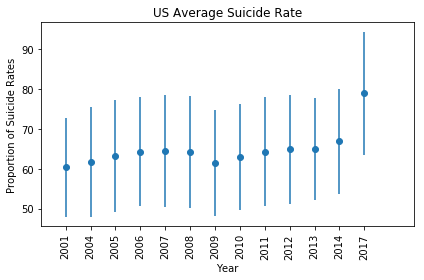

In [33]:
years = ['2001', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2017']
means = suicide_df_sub.mean()
std_errs = suicide_df_sub.std()

# Setting up the plot
fig, ax = plt.subplots()

ax.errorbar(years, means, std_errs, fmt="o")

ax.set_xlim(-1, len(years) + 1)

ax.set_title("US Average Suicide Rate")
ax.set_xlabel("Year")
ax.set_ylabel("Proportion of Suicide Rates")

plt.xticks(rotation=90)
fig.tight_layout()
fig.savefig(output_us_avg_suicide_rts_error_bar)
plt.show()

### expenditures



In [143]:
exp_us = "../data/rawdata/StateMentalHealthServiceExpenditures2004_2013.csv"
exp_df_all = pd.read_csv(exp_us)

#remove US and PR
exp_df = exp_df_all[(exp_df_all.state != 'US') & (exp_df_all.state != 'PR')]

#replace NR values with np.nan
exp_df['FY2011__SMHA Expenditures Per Capita'] = exp_df['FY2011__SMHA Expenditures Per Capita'].replace('NR', np.NaN, regex=True)
exp_df['FY2013__SMHA Expenditures Per Capita'] = exp_df['FY2013__SMHA Expenditures Per Capita'].replace('NR', np.NaN, regex=True)

#change those columns to numeric values
exp_df["FY2011__SMHA Expenditures Per Capita"] = pd.to_numeric(exp_df["FY2011__SMHA Expenditures Per Capita"])
exp_df["FY2013__SMHA Expenditures Per Capita"] = pd.to_numeric(exp_df["FY2013__SMHA Expenditures Per Capita"])

exp_df

/Users/amyclaman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/amyclaman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/amyclaman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,state,Location,FY2004__SMHA Expenditures Per Capita,FY2005__SMHA Expenditures Per Capita,FY2006__SMHA Expenditures Per Capita,FY2007__SMHA Expenditures Per Capita,FY2008__SMHA Expenditures Per Capita,FY2009__SMHA Expenditures Per Capita,FY2010__SMHA Expenditures Per Capita,FY2011__SMHA Expenditures Per Capita,FY2012__SMHA Expenditures Per Capita,FY2013__SMHA Expenditures Per Capita
1,AL,Alabama,58.78,60.31,64.43,74.03,79.39,77.89,78.19,78.33,76.27,72.64
2,AK,Alaska,287.56,269.64,278.63,293.16,277.03,289.71,310.01,380.33,335.36,341.08
3,AZ,Arizona,135.64,146.22,156.78,158.07,173.85,196.13,221.27,214.48,209.44,205.23
4,AR,Arkansas,32.95,35.60,38.58,39.72,40.53,42.77,42.02,NaN,45.05,45.56
5,CA,California,113.61,118.65,122.98,134.94,150.34,157.62,152.60,162.00,169.65,160.50
6,CO,Colorado,69.07,74.28,71.69,76.33,81.71,86.83,88.41,91.16,95.01,98.80
7,CT,Connecticut,152.09,157.21,169.68,174.94,188.74,197.62,189.34,202.44,213.43,216.76
8,DE,Delaware,84.92,89.19,103.60,105.75,111.07,109.13,106.04,101.94,100.02,96.53
9,DC,District of Columbia,409.92,404.40,394.10,392.27,381.90,388.83,NaN,307.45,305.37,306.87
10,FL,Florida,35.96,36.56,38.17,39.87,42.11,40.90,39.55,39.04,37.28,NaN


In [155]:

#rename columns with just years
exp_df_renamed = exp_df.rename(columns={"FY2004__SMHA Expenditures Per Capita":"2004",
                                        "FY2005__SMHA Expenditures Per Capita":"2005",
                                        "FY2006__SMHA Expenditures Per Capita":"2006",
                                        "FY2007__SMHA Expenditures Per Capita":"2007",
                                        "FY2008__SMHA Expenditures Per Capita":"2008",
                                        "FY2009__SMHA Expenditures Per Capita":"2009",                                        "FY2010__SMHA Expenditures Per Capita":"2010",
                                        "FY2011__SMHA Expenditures Per Capita":"2011",
                                        "FY2012__SMHA Expenditures Per Capita":"2012",
                                        "FY2013__SMHA Expenditures Per Capita":"2013"})
#print(exp_df_renamed)
new_df=exp_df_renamed.drop(columns=['Location']).set_index('state')
# Collect the mean unemployment rates for the world
avg_expenditures = new_df.mean()

# Collect the years where data was collected
years = avg_expenditures.keys()

suicide_df_sub.set_index('stateName')
avg_suicides = suicide_df_sub.mean()
avg_suicides
# Plot the us average expenditures from 2004-2013a
#expen_avg, = plt.plot(years, avg_expenditures, color="blue", label="Average Expenditures" )

# Plot the unemployment values for a single country
#suicide_avg, = plt.plot(years, avg_suicides, color="green",label='Average Suicide Rate')

#transpose df
#exp_transposed = x.drop(columns=['Location']).T

#exp_transposed


2004suic    61.654902
2005suic    63.145098
2006suic    64.258824
2007suic    64.447059
2008suic    64.174510
2009suic    61.511765
2010suic    62.943137
2011suic    64.260784
2012suic    64.809804
2013suic    64.937255
dtype: float64

In [99]:
avg_expenditures

2004     97.997451
2005    103.441765
2006    111.304314
2007    119.426200
2008    126.800784
2009    129.049020
2010    122.727200
2011    129.162941
2012    129.402549
2013    128.401176
dtype: float64

In [15]:
exp_us = "../data/rawdata/StateMentalHealthServiceExpenditures2004_2013.csv"
exp_df_all = pd.read_csv(exp_us)
#remove US and PR
exp_df = exp_df_all[(exp_df_all.state != 'US') & (exp_df_all.state != 'PR')]

#replace NR values w/ 0's for time being
exp_df.update(
    exp_df.loc[exp_df['FY2011__SMHA Expenditures Per Capita']=='NR', 'FY2011__SMHA Expenditures Per Capita'].replace('NR', '0', regex=True)
)
exp_df.update(
    exp_df.loc[exp_df['FY2013__SMHA Expenditures Per Capita']=='NR', 'FY2013__SMHA Expenditures Per Capita'].replace('NR', '0', regex=True)
)
#change those columns to numeric values
exp_df["FY2011__SMHA Expenditures Per Capita"] = pd.to_numeric(exp_df["FY2011__SMHA Expenditures Per Capita"])
exp_df["FY2013__SMHA Expenditures Per Capita"] = pd.to_numeric(exp_df["FY2013__SMHA Expenditures Per Capita"])
print(exp_df.info())

min_val=22
max_val=410
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 100, 200, 300, 400, 500]

# Create the names for the four bins
group_names = ["Under100", "Btwn100and200", "Btwn200and300", "Btwn300and400", "Over400"]

exp_df["2004 Group Expenditure"] = pd.cut(exp_df["FY2004__SMHA Expenditures Per Capita"], bins, labels=group_names, right=False)
exp_df["2005 Group Expenditure"] = pd.cut(exp_df["FY2005__SMHA Expenditures Per Capita"], bins, labels=group_names, right=False)
exp_df["2006 Group Expenditure"] = pd.cut(exp_df["FY2006__SMHA Expenditures Per Capita"], bins, labels=group_names, right=False)
exp_df["2007 Group Expenditure"] = pd.cut(exp_df["FY2007__SMHA Expenditures Per Capita"], bins, labels=group_names, right=False)
exp_df["2008 Group Expenditure"] = pd.cut(exp_df["FY2008__SMHA Expenditures Per Capita"], bins, labels=group_names, right=False)
exp_df["2009 Group Expenditure"] = pd.cut(exp_df["FY2009__SMHA Expenditures Per Capita"], bins, labels=group_names, right=False)
exp_df["2010 Group Expenditure"] = pd.cut(exp_df["FY2010__SMHA Expenditures Per Capita"], bins, labels=group_names, right=False)
exp_df["2011 Group Expenditure"] = pd.cut(exp_df["FY2011__SMHA Expenditures Per Capita"], bins, labels=group_names, right=False)
exp_df["2012 Group Expenditure"] = pd.cut(exp_df["FY2012__SMHA Expenditures Per Capita"], bins, labels=group_names, right=False)
exp_df["2013 Group Expenditure"] = pd.cut(exp_df["FY2013__SMHA Expenditures Per Capita"], bins, labels=group_names, right=False)
#exp_df_sub = exp_df[["state", "2004 Group Expenditure","2005 Group Expenditure","2006 Group Expenditure", "2007 Group Expenditure", "2008 Group Expenditure", "2009 Group Expenditure", "2010 Group Expenditure", "2011 Group Expenditure", "2012 Group Expenditure", "2013 Group Expenditure"]]
#exp_df_sub
a2004_df=exp_df[['state', 'FY2004__SMHA Expenditures Per Capita', '2004 Group Expenditure']]
a2005_df=exp_df[['state', 'FY2005__SMHA Expenditures Per Capita', '2005 Group Expenditure']]
a2006_df=exp_df[['state', 'FY2006__SMHA Expenditures Per Capita', '2006 Group Expenditure']]
a2007_df=exp_df[['state', 'FY2007__SMHA Expenditures Per Capita', '2007 Group Expenditure']]
a2008_df=exp_df[['state', 'FY2008__SMHA Expenditures Per Capita', '2008 Group Expenditure']]
a2009_df=exp_df[['state', 'FY2009__SMHA Expenditures Per Capita', '2009 Group Expenditure']]
a2010_df=exp_df[['state', 'FY2010__SMHA Expenditures Per Capita', '2010 Group Expenditure']]
a2011_df=exp_df[['state', 'FY2011__SMHA Expenditures Per Capita', '2011 Group Expenditure']]
a2012_df=exp_df[['state', 'FY2012__SMHA Expenditures Per Capita', '2012 Group Expenditure']]
a2013_df=exp_df[['state', 'FY2013__SMHA Expenditures Per Capita', '2013 Group Expenditure']]


/Users/amyclaman/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5085: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
/Users/amyclaman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/amyclaman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 12 columns):
state                                   51 non-null object
Location                                51 non-null object
FY2004__SMHA Expenditures Per Capita    51 non-null float64
FY2005__SMHA Expenditures Per Capita    51 non-null float64
FY2006__SMHA Expenditures Per Capita    51 non-null float64
FY2007__SMHA Expenditures Per Capita    50 non-null float64
FY2008__SMHA Expenditures Per Capita    51 non-null float64
FY2009__SMHA Expenditures Per Capita    51 non-null float64
FY2010__SMHA Expenditures Per Capita    50 non-null float64
FY2011__SMHA Expenditures Per Capita    51 non-null float64
FY2012__SMHA Expenditures Per Capita    51 non-null float64
FY2013__SMHA Expenditures Per Capita    51 non-null float64
dtypes: float64(10), object(2)
memory usage: 5.2+ KB
None


/Users/amyclaman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/amyclaman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/amyclaman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [63]:
a2004_df

,state,FY2004__SMHA Expenditures Per Capita,2004 Group Expenditure
0,US,93.04,Under100
1,AL,58.78,Under100
2,AK,287.56,Btwn200and300
3,AZ,135.64,Btwn100and200
4,AR,32.95,Under100
5,CA,113.61,Btwn100and200
6,CO,69.07,Under100
7,CT,152.09,Btwn100and200
8,DE,84.92,Under100
9,DC,409.92,Over400


### Post API call check of data
* Export the city data into a .csv.
* Display the DataFrame info

In [157]:
import gmaps
import pandas as pd

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [123]:
# Create aiport dataframe
facil_df = pd.read_csv('../data/cleandata/facilities.csv')
facil_df.head()

# Store latitude and longitude in locations
locations = facil_df[["latitude", "longitude"]]

# Customize the size of the figure
figure_layout = {
    'width': '1000px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations)
# Add the layer to the map
fig.add_layer(markers)
fig


fig.savefig(output_facilities_google_map)

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

In [168]:
facil_df = pd.read_csv('../data/cleandata/facilities.csv')
cities = facil_df.city.unique()

for city in cities:
    try

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

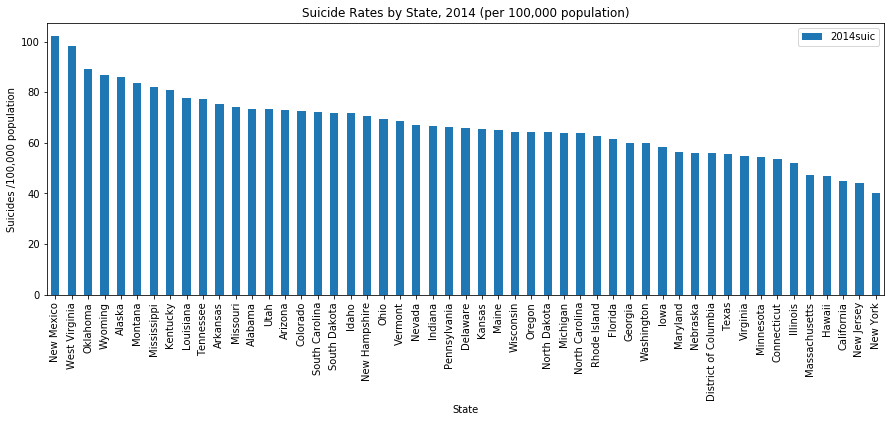

In [28]:
output_us_2017_rates_bar = "../Images/us_suic_rt_2014.png"

df = pd.read_csv('../data/cleandata/SuicByState10yr.csv')
df.groupby('stateName').mean()
state_data = df[['stateName','2014suic']].set_index('stateName')
state_data.sort_values(by=['2014suic'], inplace=True, ascending=False)
state_data.plot(kind='bar', figsize=(15,5))


plt.ylabel("Suicides /100,000 population")
plt.xlabel("State")
plt.title("Suicide Rates by State, 2014 (per 100,000 population)")

plt.savefig(output_us_2017_rates_bar)
plt.show()
